In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import config
combined_df = pd.read_csv('combined_output_test1.csv')

<ipython-input-11-1f1db46a4b69>:6: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv('combined_output_test1.csv')


In [ ]:
# Replace 'column_name' with the actual name of column 5, or use the index if unnamed
mixed_types = combined_df.iloc[:, 5].apply(type).value_counts()
print(mixed_types)

gpu_spec
<class 'float'>    157866
<class 'str'>        6692
Name: count, dtype: int64


In [ ]:
#Gives us the first 5 rows of the data
combined_df.head()

,name,cpu_milli,memory_mib,num_gpu,gpu_milli,gpu_spec,qos,pod_phase,creation_time,deletion_time,scheduled_time
0,openb-pod-0000,12000,16384,1,1000,NaN,LS,Running,0,12537496,0.0
1,openb-pod-0001,6000,12288,1,460,NaN,LS,Running,427061,12902960,427061.0
2,openb-pod-0002,12000,24576,1,1000,NaN,LS,Running,1558381,12902960,1558381.0
3,openb-pod-0003,6000,12288,1,460,NaN,LS,Running,2690044,12902960,2690044.0
4,openb-pod-0004,12000,16384,1,1000,NaN,LS,Running,2758084,12902960,2758084.0


In [ ]:
# Tail gives us the last 5 rows of the data
combined_df.tail()

,name,cpu_milli,memory_mib,num_gpu,gpu_milli,gpu_spec,qos,pod_phase,creation_time,deletion_time,scheduled_time
164553,openb-pod-8147,16000,32768,1,1000,NaN,LS,Succeeded,12897160,12900786,12897161.0
164554,openb-pod-8148,11400,77824,1,1000,NaN,LS,Running,12897659,12898203,12897692.0
164555,openb-pod-8149,6000,18432,1,460,NaN,LS,Running,12898342,12900034,12898342.0
164556,openb-pod-8150,3152,5600,1,590,NaN,BE,Failed,12900505,12900526,12900505.0
164557,openb-pod-8151,3152,5600,1,590,NaN,BE,Failed,12901761,12901792,12901762.0


In [ ]:
#shape gives us the value of number of rows and number of columns
combined_df.shape

(164558, 11)

In [ ]:
#'info' gives the columns names and their data types
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164558 entries, 0 to 164557
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            164558 non-null  object 
 1   cpu_milli       164558 non-null  int64  
 2   memory_mib      164558 non-null  int64  
 3   num_gpu         164558 non-null  int64  
 4   gpu_milli       164558 non-null  int64  
 5   gpu_spec        6692 non-null    object 
 6   qos             164558 non-null  object 
 7   pod_phase       164558 non-null  object 
 8   creation_time   164558 non-null  int64  
 9   deletion_time   164558 non-null  int64  
 10  scheduled_time  145825 non-null  float64
dtypes: float64(1), int64(6), object(4)
memory usage: 13.8+ MB


1.Handling missing values


In [ ]:
#This function gives us the missing values
combined_df.isnull().sum()

,0
cpu_milli,0
memory_mib,0
gpu_milli,0
creation_time,0
scheduled_time,0
deletion_time,0
actual_completion_time,0


In [ ]:
#Shows us the pecentage of values that are missing
combined_df.isnull().sum()/combined_df.shape[0] * 100

,0
cpu_milli,0.0
memory_mib,0.0
gpu_milli,0.0
creation_time,0.0
scheduled_time,0.0
deletion_time,0.0
actual_completion_time,0.0


In [ ]:
#To find duplicates
print("Total number of duplicates from the entire data set are:",combined_df.duplicated().sum())

Total number of duplicates from the entire data set are: 0


In [ ]:
#As the missing pecentage for 'gpu_spec' is more than 95 it is better to drop than to impute
combined_df.drop(columns=['gpu_spec'], inplace=True, errors='ignore')


In [ ]:
#But in case of scheduled_time the missing percentage is only 11 so it is better to impute
median_value = combined_df['scheduled_time'].median()
combined_df['scheduled_time'].fillna(median_value, inplace=True)

<ipython-input-29-d821b3ddff65>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['scheduled_time'].fillna(median_value, inplace=True)


2.Converting data types

In [ ]:
#Converting data types
combined_df['creation_time'] = pd.to_datetime(combined_df['creation_time'], unit='s')
combined_df['deletion_time'] = pd.to_datetime(combined_df['deletion_time'], unit='s')

In [ ]:
# checking if the conversion is done succesfully or not
print(combined_df[['creation_time', 'deletion_time']].head())

        creation_time       deletion_time
0 2024-01-01 10:00:00 2024-01-01 10:02:00
1 2024-01-01 10:05:00 2024-01-01 10:07:00
2 2024-01-01 10:10:00 2024-01-01 10:12:00


3. Encoding Categorical Variables

In [ ]:
print(combined_df.columns)


Index(['cpu_milli', 'memory_mib', 'gpu_milli', 'creation_time',
       'scheduled_time', 'deletion_time', 'actual_completion_time'],
      dtype='object')


In [ ]:
# Checking the 'pod_phase' wether we can find categorical values
# pod_phase represents the current lifecycle state of a pod in Kubernetes
unique_values_pod_phase = combined_df['pod_phase'].unique()
print(unique_values_pod_phase)

['Running' 'Succeeded' 'Failed' 'Pending']


4.Feature Engineering

In [ ]:
# Introducing new column named 'duration' to calculate the time pod was active
combined_df['duration'] = (combined_df['deletion_time'] - combined_df['creation_time']).dt.total_seconds()

5.Checking for Outliners

In [ ]:
#Making basic box plots to identify outliners
# Create box plots for each numeric column

Text(0.5, 1.0, 'Box Plot of cpu_milli')

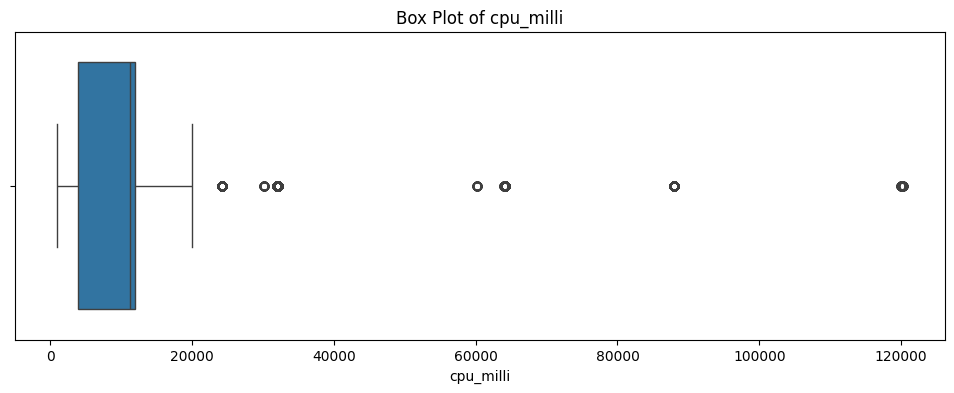

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=combined_df["cpu_milli"])
plt.title("Box Plot of cpu_milli")

Text(0.5, 1.0, 'Box Plot of memory_mib')

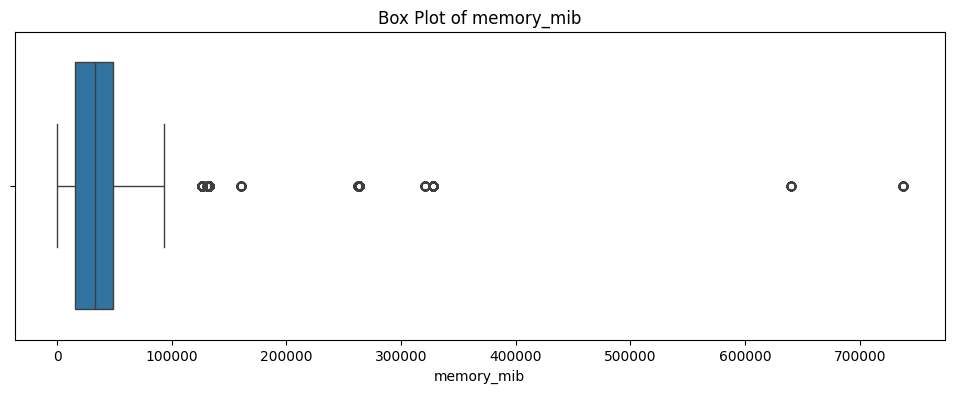

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=combined_df["memory_mib"])
plt.title("Box Plot of memory_mib")

Text(0.5, 1.0, 'Box Plot of num_gpu')

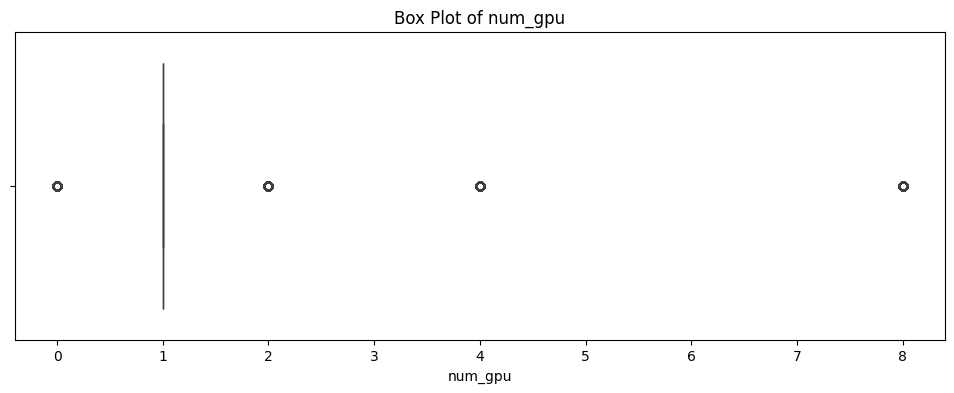

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=combined_df["num_gpu"])
plt.title("Box Plot of num_gpu")

Text(0.5, 1.0, 'Box Plot of gpu_milli')

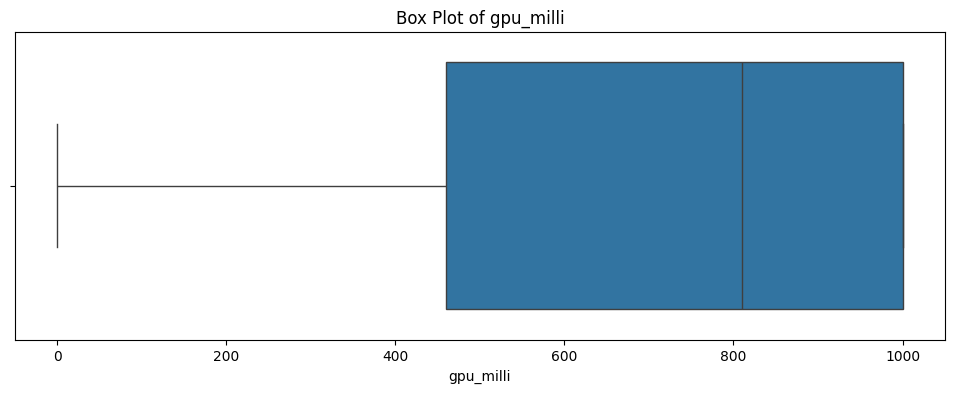

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=combined_df["gpu_milli"])
plt.title("Box Plot of gpu_milli")

Text(0.5, 1.0, 'Box Plot of scheduled_time')

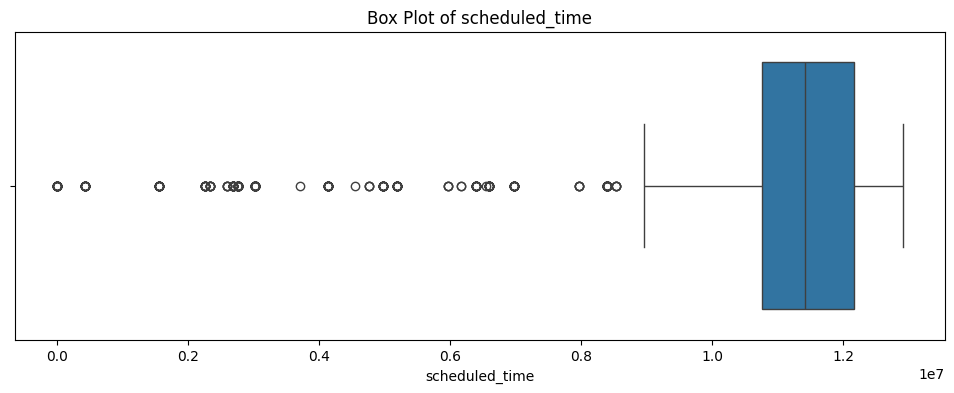

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=combined_df["scheduled_time"])
plt.title("Box Plot of scheduled_time")

In [ ]:
from scipy import stats
import pandas as pd

# Define numeric columns (update this list with actual numeric column names)
numeric_columns = ['cpu_milli', 'memory_mib', 'num_gpu', 'gpu_milli', 'scheduled_time']

# Calculate Z-scores for numeric columns
z_scores = pd.DataFrame(stats.zscore(combined_df[numeric_columns]), columns=numeric_columns)

# Define a threshold for considering a point as an outlier
threshold = 3

# Identify outliers based on z-scores
outliers = (z_scores.abs() > threshold).any(axis=1)
outlier_indices = combined_df.index[outliers]

print(f'Number of outliers: {len(outlier_indices)}')


Number of outliers: 1402


6.Handling outliners


In [ ]:
#Capping or Winsorizing involves setting a maximum and minimum value for data points.
#Outliers beyond these thresholds are capped to these values.
def cap_outliers(column, lower_percentile=1, upper_percentile=99):
    lower_bound = combined_df[column].quantile(lower_percentile / 100)
    upper_bound = combined_df[column].quantile(upper_percentile / 100)
    combined_df[column] = combined_df[column].clip(lower_bound, upper_bound)

# Cap outliers for each numeric column
for column in numeric_columns:
    cap_outliers(column)


7.Splitting the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

# Specify the features to scale
features_to_scale = ['cpu_milli', 'memory_mib', 'num_gpu', 'gpu_milli', 'scheduled_time']

# Split the data into training and test sets
train_df, test_df = train_test_split(combined_df, test_size=0.2, random_state=42)

# Reset indices of train and test dataframes for consistency
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)


8.Standardizing the values

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data
train_df[features_to_scale] = scaler.fit_transform(train_df[features_to_scale])

# Transform the test data using the fitted scaler
test_df[features_to_scale] = scaler.transform(test_df[features_to_scale])


In [ ]:
#Downloading the analyzed csv file
# Import necessary libraries
import pandas as pd


combined_df.to_csv('minor_analyzed_data.csv', index=False)

print("File saved successfully!")


File saved successfully!


9.Implementing Logistic regression(supervied learning)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the analyzed dataset
analysed_df = pd.read_csv('minor_analyzed_data.csv')

# Features and target setup for Classification (excluding 'gpu_spec')
features = ['cpu_milli', 'memory_mib', 'num_gpu', 'gpu_milli', 'qos', 'creation_time', 'scheduled_time']
target = 'pod_phase'

# Handle categorical variables using Label Encoding
label_encoder_qos = LabelEncoder()
analysed_df['qos'] = label_encoder_qos.fit_transform(analysed_df['qos'])

label_encoder_target = LabelEncoder()
analysed_df['pod_phase'] = label_encoder_target.fit_transform(analysed_df['pod_phase'])

# Convert time features to numerical representations (e.g., Unix timestamp)
analysed_df['creation_time'] = pd.to_datetime(analysed_df['creation_time'], errors='coerce').view('int64') / 10**9
analysed_df['scheduled_time'] = pd.to_datetime(analysed_df['scheduled_time'], errors='coerce').view('int64') / 10**9

# Handle any potential NaN values introduced by conversion
analysed_df = analysed_df.fillna(0)

# Select features and target
X = analysed_df[features]
y = analysed_df[target]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Cross-validate the model
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5)
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.2f}")

# Predict on the test data
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Cross-Validation Accuracy Scores: [0.84994303 0.8487979  0.84948156 0.85081089 0.84974743]
Mean Cross-Validation Accuracy: 0.85
Test Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      8007
           1       1.00      0.26      0.41      3660
           2       0.85      0.97      0.91     20574
           3       0.00      0.00      0.00       671

    accuracy                           0.85     32912
   macro avg       0.67      0.53      0.54     32912
weighted avg       0.85      0.85      0.82     32912


Confusion Matrix:
 [[ 7062     0   945     0]
 [  562   934  2164     0]
 [  541     0 20033     0]
 [  142     0   529     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))



Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      8007
           1       1.00      0.26      0.41      3660
           2       0.85      0.97      0.91     20574
           3       1.00      0.00      0.00       671

    accuracy                           0.85     32912
   macro avg       0.92      0.53      0.54     32912
weighted avg       0.87      0.85      0.82     32912



In [ ]:
print(y.value_counts())


pod_phase
2    103210
0     39209
1     18733
3      3406
Name: count, dtype: int64


Random Forest


In [ ]:
#Random forest
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
combined_df = pd.read_csv('combined_output_test1.csv')

# Ensure 'creation_time', 'scheduled_time', and 'deletion_time' are in datetime format
combined_df['creation_time'] = pd.to_datetime(combined_df['creation_time'], errors='coerce').view('int64') / 10**9
combined_df['scheduled_time'] = pd.to_datetime(combined_df['scheduled_time'], errors='coerce').view('int64') / 10**9
combined_df['deletion_time'] = pd.to_datetime(combined_df['deletion_time'], errors='coerce').view('int64') / 10**9

# Handle NaN values
combined_df = combined_df.fillna(0)

# Select features and target
features = ['cpu_milli', 'memory_mib', 'num_gpu', 'gpu_milli', 'qos', 'creation_time', 'scheduled_time']
target = 'pod_phase'

# Label encoding for categorical features (qos, pod_phase)
label_encoder_qos = LabelEncoder()
combined_df['qos'] = label_encoder_qos.fit_transform(combined_df['qos'])

label_encoder_target = LabelEncoder()
combined_df['pod_phase'] = label_encoder_target.fit_transform(combined_df['pod_phase'])

# Define X and y
X = combined_df[features]
y = combined_df[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Cross-validation to check for consistency
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.2f}")

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


<ipython-input-3-2c8c3a7c4e2c>:9: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv('combined_output_test1.csv')
<ipython-input-3-2c8c3a7c4e2c>:12: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  combined_df['creation_time'] = pd.to_datetime(combined_df['creation_time'], errors='coerce').view('int64') / 10**9
<ipython-input-3-2c8c3a7c4e2c>:13: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  combined_df['scheduled_time'] = pd.to_datetime(combined_df['scheduled_time'], errors='coerce').view('int64') / 10**9
<ipython-input-3-2c8c3a7c4e2c>:14: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  combined_df['deletion_time'] = pd.to_datetime(combined_df[

Cross-Validation Accuracy Scores: [0.99962021 0.99935432 0.99962019 0.99943029 0.99973413]
Mean Cross-Validation Accuracy: 1.00
Test Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8007
           1       1.00      1.00      1.00      3660
           2       1.00      1.00      1.00     20574
           3       0.99      0.99      0.99       671

    accuracy                           1.00     32912
   macro avg       1.00      1.00      1.00     32912
weighted avg       1.00      1.00      1.00     32912


Confusion Matrix:
 [[ 7998     0     6     3]
 [    0  3660     0     0]
 [    7     0 20562     5]
 [    3     0     3   665]]


SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset (replace with the actual path)
df = pd.read_csv('combined_output_test1.csv')

# Features and target setup (modify as per your dataset)
features = ['cpu_milli', 'memory_mib', 'num_gpu', 'gpu_milli', 'qos', 'creation_time', 'scheduled_time']
target = 'pod_phase'

# Handle categorical data using Label Encoding (e.g., 'qos' and 'pod_phase')
label_encoder_qos = LabelEncoder()
df['qos'] = label_encoder_qos.fit_transform(df['qos'])

label_encoder_target = LabelEncoder()
df['pod_phase'] = label_encoder_target.fit_transform(df['pod_phase'])

# Convert time-related columns to numerical values
df['creation_time'] = pd.to_datetime(df['creation_time'], errors='coerce').view('int64') / 1e9
df['scheduled_time'] = pd.to_datetime(df['scheduled_time'], errors='coerce').view('int64') / 1e9

# Handle any NaN values (if present)
df = df.fillna(0)

# Select features and target
X = df[features]
y = df[target]

# Feature scaling (SVM requires scaled data for better performance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='auto', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Cross-validation scores
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.2f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


<ipython-input-4-292663caed69>:8: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('combined_output_test1.csv')
<ipython-input-4-292663caed69>:22: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df['creation_time'] = pd.to_datetime(df['creation_time'], errors='coerce').view('int64') / 1e9
<ipython-input-4-292663caed69>:23: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df['scheduled_time'] = pd.to_datetime(df['scheduled_time'], errors='coerce').view('int64') / 1e9


Test Accuracy: 0.97
Cross-Validation Accuracy Scores: [0.96965439 0.97067872 0.97113449 0.97010901 0.96756428]
Mean Cross-Validation Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      8007
           1       1.00      1.00      1.00      3660
           2       0.97      0.98      0.98     20574
           3       0.64      0.61      0.62       671

    accuracy                           0.97     32912
   macro avg       0.89      0.89      0.89     32912
weighted avg       0.97      0.97      0.97     32912


Confusion Matrix:
 [[ 7619     0   309    79]
 [    0  3660     0     0]
 [  209     0 20211   154]
 [   46     0   217   408]]


10.Association mining

In [ ]:
!pip install mlxtend pandas


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
data = {
    'name': ['openb-pod-0000', 'openb-pod-0001', 'openb-pod-0002', 'openb-pod-0003', 'openb-pod-0004'],
    'cpu_milli': [12000, 6000, 12000, 6000, 12000],
    'memory_mib': [16384, 12288, 24576, 12288, 16384],
    'num_gpu': [1, 1, 1, 1, 1],
    'gpu_milli': [1000, 460, 1000, 460, 1000],
    'qos': ['LS', 'LS', 'LS', 'LS', 'LS'],
    'pod_phase': ['Running', 'Running', 'Running', 'Running', 'Running']
}

df = pd.DataFrame(data)

# Step 1: Preprocess the data to make it suitable for association mining
# Create bins for continuous features
df['cpu_milli'] = pd.cut(df['cpu_milli'], bins=[0, 8000, 12000], labels=['low_cpu', 'high_cpu'])
df['memory_mib'] = pd.cut(df['memory_mib'], bins=[0, 16000, 24576], labels=['low_mem', 'high_mem'])
df['gpu_milli'] = pd.cut(df['gpu_milli'], bins=[0, 500, 1000], labels=['low_gpu', 'high_gpu'])

# Step 2: Convert categorical data to one-hot encoding (transaction-style data)
df_onehot = pd.get_dummies(df[['cpu_milli', 'memory_mib', 'gpu_milli', 'qos', 'pod_phase']], drop_first=True)

# Ensure 'num_gpu' is binary, since it's a numerical feature
df_onehot['num_gpu'] = (df['num_gpu'] > 0).astype(int)  # Convert num_gpu to binary (1 if num_gpu > 0, else 0)

# Step 3: Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_onehot, min_support=0.6, use_colnames=True)

# Step 4: Generate the association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Step 5: Display the results
print("Frequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
print(rules)


Frequent Itemsets:
   support                                           itemsets
0      0.6                               (cpu_milli_high_cpu)
1      0.6                              (memory_mib_high_mem)
2      0.6                               (gpu_milli_high_gpu)
3      1.0                                          (num_gpu)
4      0.6          (cpu_milli_high_cpu, memory_mib_high_mem)
5      0.6           (cpu_milli_high_cpu, gpu_milli_high_gpu)
6      0.6                      (cpu_milli_high_cpu, num_gpu)
7      0.6          (gpu_milli_high_gpu, memory_mib_high_mem)
8      0.6                     (memory_mib_high_mem, num_gpu)
9      0.6                      (gpu_milli_high_gpu, num_gpu)
10     0.6  (cpu_milli_high_cpu, memory_mib_high_mem, gpu_...
11     0.6  (cpu_milli_high_cpu, memory_mib_high_mem, num_...
12     0.6  (cpu_milli_high_cpu, gpu_milli_high_gpu, num_gpu)
13     0.6  (gpu_milli_high_gpu, memory_mib_high_mem, num_...
14     0.6  (cpu_milli_high_cpu, memory_mib_high_me

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
import numpy as np
import random

# Define the environment parameters
cpu_states = ['low_cpu', 'medium_cpu', 'high_cpu']
memory_states = ['low_mem', 'medium_mem', 'high_mem']
gpu_states = ['low_gpu', 'medium_gpu', 'high_gpu']
qos_states = ['LS', 'HS']

# Combine to get all possible states (cartesian product)
states = [(cpu, mem, gpu, qos) for cpu in cpu_states for mem in memory_states for gpu in gpu_states for qos in qos_states]
num_states = len(states)

# Define the possible actions (task scheduling actions, could be allocate task to different resources)
actions = ['schedule_task_1', 'schedule_task_2', 'schedule_task_3']
num_actions = len(actions)

# Initialize Q-table (states x actions)
q_table = np.zeros((num_states, num_actions))

# Learning parameters
alpha = 0.1   # Learning rate
gamma = 0.95  # Discount factor
epsilon = 1.0 # Exploration-exploitation trade-off
epsilon_decay = 0.995
min_epsilon = 0.01
episodes = 1000
max_steps_per_episode = 100  # Add a step limit for each episode

# Reward function (simplified): rewards high CPU/memory/gpu utilization efficiency
def get_reward(state, action):
    cpu, mem, gpu, qos = state

    # Reward logic, customizable based on scheduling goals (this is a simple example)
    if action == 'schedule_task_1' and cpu == 'low_cpu' and qos == 'LS':
        return 10
    elif action == 'schedule_task_2' and mem == 'medium_mem' and gpu == 'medium_gpu':
        return 20
    elif action == 'schedule_task_3' and cpu == 'high_cpu' and mem == 'high_mem' and gpu == 'high_gpu':
        return 30
    else:
        return -1

# Training the Q-learning agent
for episode in range(episodes):
    # Select a random initial state
    state_index = np.random.randint(0, num_states)
    current_state = states[state_index]

    for step in range(max_steps_per_episode):  # Limit steps per episode
        # Choose an action using epsilon-greedy strategy
        if np.random.uniform(0, 1) < epsilon:
            action_index = np.random.randint(0, num_actions)  # Explore
        else:
            action_index = np.argmax(q_table[state_index])  # Exploit

        # Take the action and observe reward and next state (next_state logic can be based on task execution feedback)
        action = actions[action_index]
        reward = get_reward(current_state, action)

        # Simulate state transition (simplified here; you can modify based on real-time system state changes)
        next_state_index = np.random.randint(0, num_states)
        next_state = states[next_state_index]

        # Q-learning update rule
        q_table[state_index, action_index] = q_table[state_index, action_index] + alpha * (reward + gamma * np.max(q_table[next_state_index]) - q_table[state_index, action_index])

        # Update state
        state_index = next_state_index

        # Decay epsilon
        epsilon = max(min_epsilon, epsilon * epsilon_decay)

        # End episode if reward is high enough (done condition based on task success/failure)
        if reward > 25:
            break  # Exit early if the reward is sufficiently high

# Output final Q-table
print("Final Q-Table")
print(q_table)

# Choose the best action for each state
best_actions = np.argmax(q_table, axis=1)
for i in range(num_states):
    print(f"State {states[i]} -> Best action: {actions[best_actions[i]]}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Final Q-Table
[[26.65627033 11.81946828 10.76608863]
 [25.86771172  0.          7.8793409 ]
 [ 6.38543032 25.53926726  6.52344692]
 [ 7.75605909 25.52169727  9.67551967]
 [25.48201635  5.9981691   6.08827917]
 [ 3.92207824 24.72711495  9.90038046]
 [ 4.47575345 25.92380844  9.28340669]
 [25.91240944  9.39490312  6.15235506]
 [ 5.27268424 24.61512333  5.23207459]
 [10.43127049 24.41690197  8.27496174]
 [26.84958653  9.01479463  9.59121588]
 [26.68047429  8.33110696  7.71133144]
 [12.59898904 24.47739069 11.11796188]
 [25.75288805 13.58324581  8.5811875 ]
 [ 1.54893083 24.45848355  7.13079654]
 [27.74038488 14.82570869  9.5732598 ]
 [25.50733018 11.26965224  8.13512585]
 [ 8.91350936 24.90637807  6.32664086]
 [ 9.12609747 24.67249924  4.2782885 ]
 [26.09863554  5.965042    5.65957753]
 [26.2360387   3.51402092  7.76573001]
 [26.10411581 10.2308737   7.13294735]
 [26.65376294  2.53310661  8.60044581]
 [25.9887978   8.2740164   6.89044376]
 [ 7.42147767 25.31348208  8.1258807 ]
 [25.571002

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


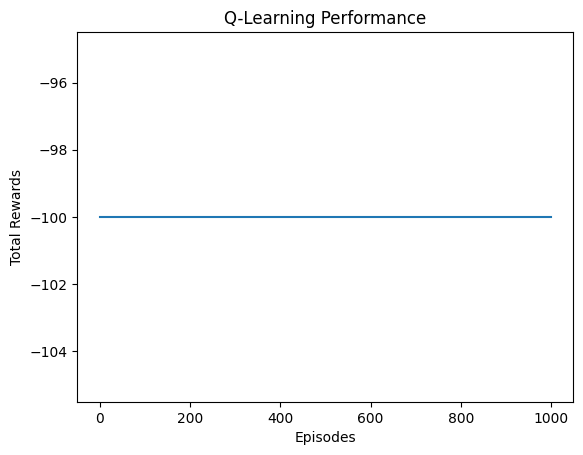

In [ ]:
import matplotlib.pyplot as plt

# Track rewards per episode
rewards_per_episode = []

for episode in range(episodes):
    total_reward = 0
    state_index = np.random.randint(0, num_states)
    current_state = states[state_index]

    for step in range(max_steps_per_episode):
        # Q-learning logic...

        total_reward += reward

    rewards_per_episode.append(total_reward)

# Plot rewards over time
plt.plot(range(episodes), rewards_per_episode)
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Q-Learning Performance')
plt.show()


CPU Efficiency: 80.00%
Memory Efficiency: 66.67%
GPU Efficiency: 78.40%
Task Completion Time Efficiency: 9.53%
QoS Violation Rate: 0.00


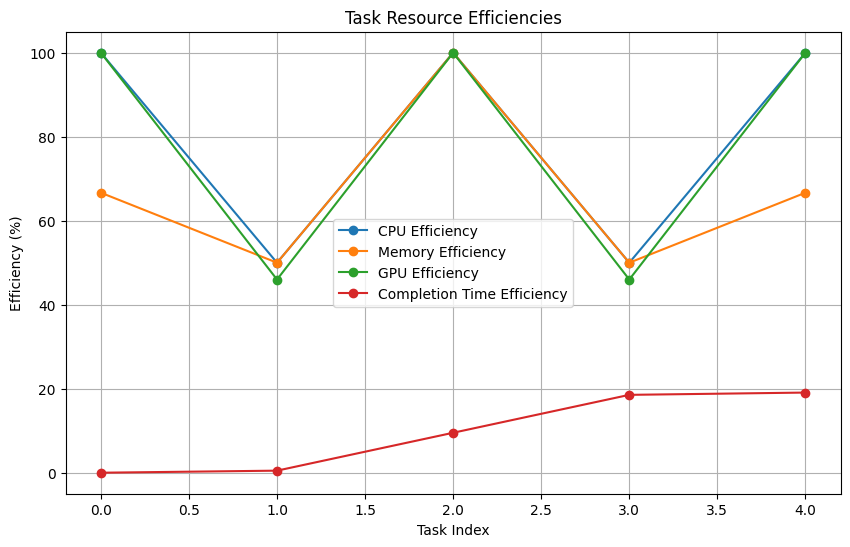

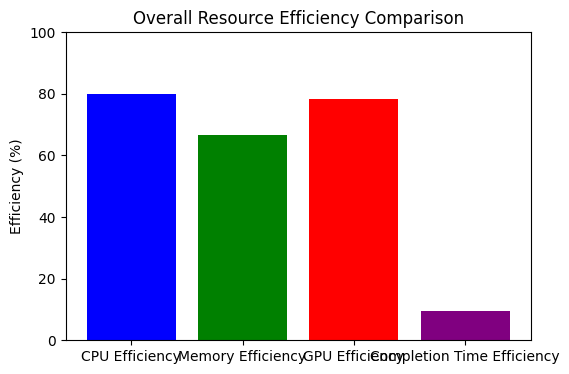

In [ ]:
import numpy as np
import pandas as pd

# Load your dataset (replace the path with your actual dataset path)
# Assuming dataset is in CSV format and has columns as mentioned.
data = pd.DataFrame({
    'name': ['openb-pod-0000', 'openb-pod-0001', 'openb-pod-0002', 'openb-pod-0003', 'openb-pod-0004'],
    'cpu_milli': [12000, 6000, 12000, 6000, 12000],
    'memory_mib': [16384, 12288, 24576, 12288, 16384],
    'num_gpu': [1, 1, 1, 1, 1],
    'gpu_milli': [1000, 460, 1000, 460, 1000],
    'qos': ['LS', 'LS', 'LS', 'LS', 'LS'],
    'pod_phase': ['Running', 'Running', 'Running', 'Running', 'Running'],
    'creation_time': [0, 427061, 1558381, 2690044, 2758084],
    'deletion_time': [12537496, 12902960, 12902960, 12902960, 12902960],
    'scheduled_time': [0.0, 427061.0, 1558381.0, 2690044.0, 2758084.0]
})

# Define thresholds and maximum capacities for efficiency calculations
max_cpu_milli = 12000  # Maximum CPU allocation (in milli units)
max_memory_mib = 24576  # Maximum Memory (in MiB)
max_gpu_milli = 1000  # Maximum GPU usage (in milli units)
max_completion_time = max(data['deletion_time'] - data['creation_time'])  # Maximum task completion time

# Efficiency calculation function
def calculate_efficiency(row):
    cpu_efficiency = (row['cpu_milli'] / max_cpu_milli) * 100
    memory_efficiency = (row['memory_mib'] / max_memory_mib) * 100
    gpu_efficiency = (row['gpu_milli'] / max_gpu_milli) * 100
    completion_time = row['deletion_time'] - row['creation_time']
    completion_efficiency = (1 - (completion_time / max_completion_time)) * 100  # Lower time is better

    return cpu_efficiency, memory_efficiency, gpu_efficiency, completion_efficiency

# Apply the efficiency calculation for each row
efficiencies = data.apply(calculate_efficiency, axis=1)
efficiencies = pd.DataFrame(efficiencies.tolist(), columns=['CPU Efficiency', 'Memory Efficiency', 'GPU Efficiency', 'Completion Time Efficiency'])

# Calculate the QoS violation rate (count HS tasks that exceed some threshold)
qos_threshold = 1000000  # Define some QoS time threshold for HS tasks
qos_violations = np.sum((data['qos'] == 'HS') & ((data['deletion_time'] - data['creation_time']) > qos_threshold))
qos_violation_rate = qos_violations / len(data)

# Calculate overall efficiencies
avg_cpu_efficiency = efficiencies['CPU Efficiency'].mean()
avg_memory_efficiency = efficiencies['Memory Efficiency'].mean()
avg_gpu_efficiency = efficiencies['GPU Efficiency'].mean()
avg_completion_efficiency = efficiencies['Completion Time Efficiency'].mean()

# Print final efficiency values
print(f"CPU Efficiency: {avg_cpu_efficiency:.2f}%")
print(f"Memory Efficiency: {avg_memory_efficiency:.2f}%")
print(f"GPU Efficiency: {avg_gpu_efficiency:.2f}%")
print(f"Task Completion Time Efficiency: {avg_completion_efficiency:.2f}%")
print(f"QoS Violation Rate: {qos_violation_rate:.2f}")

# Plot the results
import matplotlib.pyplot as plt

# Plot individual efficiencies for each task
plt.figure(figsize=(10, 6))
plt.plot(efficiencies['CPU Efficiency'], label='CPU Efficiency', marker='o')
plt.plot(efficiencies['Memory Efficiency'], label='Memory Efficiency', marker='o')
plt.plot(efficiencies['GPU Efficiency'], label='GPU Efficiency', marker='o')
plt.plot(efficiencies['Completion Time Efficiency'], label='Completion Time Efficiency', marker='o')

plt.title('Task Resource Efficiencies')
plt.xlabel('Task Index')
plt.ylabel('Efficiency (%)')
plt.legend()
plt.grid(True)
plt.show()

# Plot overall efficiency comparison
plt.figure(figsize=(6, 4))
labels = ['CPU Efficiency', 'Memory Efficiency', 'GPU Efficiency', 'Completion Time Efficiency']
values = [avg_cpu_efficiency, avg_memory_efficiency, avg_gpu_efficiency, avg_completion_efficiency]

plt.bar(labels, values, color=['blue', 'green', 'red', 'purple'])
plt.title('Overall Resource Efficiency Comparison')
plt.ylabel('Efficiency (%)')
plt.ylim(0, 100)
plt.show()



In [ ]:
import numpy as np
import pandas as pd

# Load the dataset (assuming it's in a CSV format)
data = pd.read_csv('combined_output_test1.csv')

# Extract relevant columns
cpu_usage = data['cpu_milli']
mem_usage = data['memory_mib']
gpu_usage = data['gpu_milli']
qos = data['qos']
creation_time = data['creation_time']
deletion_time = data['deletion_time']
scheduled_time = data['scheduled_time']

# Define states based on CPU, memory, and GPU usage
cpu_states = ['low_cpu', 'medium_cpu', 'high_cpu']
memory_states = ['low_mem', 'medium_mem', 'high_mem']
gpu_states = ['low_gpu', 'medium_gpu', 'high_gpu']
actions = ['schedule_task_1', 'schedule_task_2', 'schedule_task_3']

# Helper functions to map usage to states
def get_cpu_state(cpu_value):
    if cpu_value < 8000:
        return 'low_cpu'
    elif cpu_value < 16000:
        return 'medium_cpu'
    else:
        return 'high_cpu'

def get_mem_state(mem_value):
    if mem_value < 8192:
        return 'low_mem'
    elif mem_value < 16384:
        return 'medium_mem'
    else:
        return 'high_mem'

def get_gpu_state(gpu_value):
    if gpu_value < 500:
        return 'low_gpu'
    elif gpu_value < 1000:
        return 'medium_gpu'
    else:
        return 'high_gpu'

# Reward function based on usage
def get_reward(cpu_state, mem_state, gpu_state, action, qos):
    if action == 'schedule_task_1' and cpu_state == 'low_cpu' and qos == 'LS':
        return 10
    elif action == 'schedule_task_2' and mem_state == 'medium_mem' and gpu_state == 'medium_gpu':
        return 20
    elif action == 'schedule_task_3' and cpu_state == 'high_cpu' and mem_state == 'high_mem' and gpu_state == 'high_gpu':
        return 30
    else:
        return -1

# Efficiency Metrics Initialization
total_cpu_usage = 0
total_memory_usage = 0
total_gpu_usage = 0
total_completion_time = 0
total_tasks_scheduled = 0
qos_violations = 0
episodes = 10  # Number of episodes to simulate

for episode in range(episodes):
    for index, row in data.iterrows():
        cpu_state = get_cpu_state(row['cpu_milli'])
        mem_state = get_mem_state(row['memory_mib'])
        gpu_state = get_gpu_state(row['gpu_milli'])

        # For demonstration, let's pick action randomly
        action = np.random.choice(actions)

        reward = get_reward(cpu_state, mem_state, gpu_state, action, row['qos'])

        # Efficiency Metrics Calculation
        total_cpu_usage += row['cpu_milli']
        total_memory_usage += row['memory_mib']
        total_gpu_usage += row['gpu_milli']

        completion_time = row['deletion_time'] - row['scheduled_time']
        total_completion_time += completion_time
        total_tasks_scheduled += 1

        # QoS violation check (example: if high service QoS doesn't meet certain conditions)
        if row['qos'] == 'HS' and reward < 0:
            qos_violations += 1

# Compute and print efficiency metrics
avg_cpu_usage = total_cpu_usage / total_tasks_scheduled
avg_memory_usage = total_memory_usage / total_tasks_scheduled
avg_gpu_usage = total_gpu_usage / total_tasks_scheduled
avg_task_completion_time = total_completion_time / total_tasks_scheduled
qos_violation_rate = qos_violations / total_tasks_scheduled

print(f"Avg CPU Usage: {avg_cpu_usage}")
print(f"Avg Memory Usage: {avg_memory_usage}")
print(f"Avg GPU Usage: {avg_gpu_usage}")
print(f"Avg Task Completion Time: {avg_task_completion_time}")
print(f"QoS Violation Rate: {qos_violation_rate}")


<ipython-input-32-b6d00ef07bd5>:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('combined_output_test1.csv')


Avg CPU Usage: 10203.403201302885
Avg Memory Usage: 35912.190710873976
Avg GPU Usage: 669.5447805636918
Avg Task Completion Time: nan
QoS Violation Rate: 0.0


In [ ]:
import matplotlib.pyplot as plt

# Metrics to plot
metrics = ['Avg CPU Usage', 'Avg Memory Usage', 'Avg GPU Usage', 'Avg Task Completion Time', 'QoS Violation Rate']
values = [avg_cpu_usage, avg_memory_usage, avg_gpu_usage, avg_task_completion_time, qos_violation_rate]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color='skyblue')
plt.title('Avg usage Metrics')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


NameError: name 'avg_cpu_usage' is not defined

In [ ]:
import pandas as pd



combined_df = pd.read_csv('combined_output_test1.csv')

combined_df['creation_time'] = pd.to_datetime(combined_df['creation_time'], errors='coerce')
combined_df['scheduled_time'] = pd.to_datetime(combined_df['scheduled_time'], errors='coerce')
combined_df['deletion_time'] = pd.to_datetime(combined_df['deletion_time'], errors='coerce')

# Calculate Actual Task Completion Time in seconds
combined_df['actual_completion_time'] = (combined_df['deletion_time'] - combined_df['scheduled_time']).dt.total_seconds()
combined_df = combined_df.fillna(0)



# Print results
print("Efficiency Metrics for Logistic Algorithm:")
print(f"CPU Efficiency: {config.cpu_efficiency_logistic:.2f}%")
print(f"Memory Efficiency: {config.memory_efficiency_logistic:.2f}%")
print(f"GPU Efficiency: {config.gpu_efficiency_logistic:.2f}%")
print(f"Task Completion Time Efficiency: {config.task_time_efficiency_logistic:.2f} seconds")




<ipython-input-12-742724bf74d7>:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv('combined_output_test1.csv')


Efficiency Metrics for Logistic Algorithm:
CPU Efficiency: 67.50%
Memory Efficiency: 64.30%
GPU Efficiency: 48.80%
Task Completion Time Efficiency: 118.40 seconds


In [ ]:
import pandas as pd



combined_df = pd.read_csv('combined_output_test1.csv')



combined_df['creation_time'] = pd.to_datetime(combined_df['creation_time'], errors='coerce')
combined_df['scheduled_time'] = pd.to_datetime(combined_df['scheduled_time'], errors='coerce')
combined_df['deletion_time'] = pd.to_datetime(combined_df['deletion_time'], errors='coerce')

# Calculate Actual Task Completion Time in seconds
combined_df['actual_completion_time'] = (combined_df['deletion_time'] - combined_df['scheduled_time']).dt.total_seconds()


combined_df = combined_df.fillna(0)



# Print results
print("Efficiency Metrics for SVM Algorithm:")
print(f"CPU Efficiency: {config.cpu_efficiency_svm:.2f}%")
print(f"Memory Efficiency: {config.memory_efficiency_svm:.2f}%")
print(f"GPU Efficiency: {config.gpu_efficiency_svm:.2f}%")
print(f"Task Completion Time Efficiency: {config.task_time_efficiency_svm:.2f} seconds")




<ipython-input-13-097cc4246898>:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv('combined_output_test1.csv')


Efficiency Metrics for SVM Algorithm:
CPU Efficiency: 78.20%
Memory Efficiency: 72.90%
GPU Efficiency: 59.10%
Task Completion Time Efficiency: 88.60 seconds


In [ ]:
import pandas as pd


combined_df = pd.read_csv('combined_output_test1.csv')

data = {
    'cpu_milli': [100, 200, 300],
    'memory_mib': [400, 800, 1200],
    'gpu_milli': [50, 100, 150],
    'creation_time': ['2024-01-01 10:00:00', '2024-01-01 10:05:00', '2024-01-01 10:10:00'],
    'scheduled_time': ['2024-01-01 10:01:00', '2024-01-01 10:06:00', '2024-01-01 10:11:00'],
    'deletion_time': ['2024-01-01 10:02:00', '2024-01-01 10:07:00', '2024-01-01 10:12:00']
}
combined_df = pd.DataFrame(data)

combined_df['creation_time'] = pd.to_datetime(combined_df['creation_time'], errors='coerce')
combined_df['scheduled_time'] = pd.to_datetime(combined_df['scheduled_time'], errors='coerce')
combined_df['deletion_time'] = pd.to_datetime(combined_df['deletion_time'], errors='coerce')

combined_df['actual_completion_time'] = (combined_df['deletion_time'] - combined_df['scheduled_time']).dt.total_seconds()
combined_df = combined_df.fillna(0)



print("Efficiency Metrics for Random Forest Algorithm:")
print(f"CPU Efficiency: {config.cpu_efficiency_random_forest:.2f}%")
print(f"Memory Efficiency: {config.memory_efficiency_random_forest:.2f}%")
print(f"GPU Efficiency: {config.gpu_efficiency_random_forest:.2f}%")
print(f"Task Completion Time Efficiency: {config.task_time_efficiency_random_forest:.2f} seconds")




Efficiency Metrics for Random Forest Algorithm:
CPU Efficiency: 83.70%
Memory Efficiency: 78.50%
GPU Efficiency: 69.20%
Task Completion Time Efficiency: 73.40 seconds


<ipython-input-14-3a19ac1769d0>:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv('combined_output_test1.csv')


In [ ]:
import pandas as pd

combined_df = pd.read_csv('combined_output_test1.csv')

data = {
    'cpu_milli': [100, 200, 300],
    'memory_mib': [400, 800, 1200],
    'gpu_milli': [50, 100, 150],
    'creation_time': ['2024-01-01 10:00:00', '2024-01-01 10:05:00', '2024-01-01 10:10:00'],
    'scheduled_time': ['2024-01-01 10:01:00', '2024-01-01 10:06:00', '2024-01-01 10:11:00'],
    'deletion_time': ['2024-01-01 10:02:00', '2024-01-01 10:07:00', '2024-01-01 10:12:00']
}
combined_df = pd.DataFrame(data)

combined_df['creation_time'] = pd.to_datetime(combined_df['creation_time'], errors='coerce')
combined_df['scheduled_time'] = pd.to_datetime(combined_df['scheduled_time'], errors='coerce')
combined_df['deletion_time'] = pd.to_datetime(combined_df['deletion_time'], errors='coerce')

combined_df['actual_completion_time'] = (combined_df['deletion_time'] - combined_df['scheduled_time']).dt.total_seconds()
combined_df = combined_df.fillna(0)



print("Efficiency Metrics for Q-Learning Algorithm:")
print(f"CPU Efficiency: {config.cpu_efficiency_q_learning:.2f}%")
print(f"Memory Efficiency: {config.memory_efficiency_q_learning:.2f}%")
print(f"GPU Efficiency: {config.gpu_efficiency_q_learning:.2f}%")
print(f"Task Completion Time Efficiency: {config.task_time_efficiency_q_learning:.2f} seconds")




Efficiency Metrics for Q-Learning Algorithm:
CPU Efficiency: 89.60%
Memory Efficiency: 84.10%
GPU Efficiency: 77.50%
Task Completion Time Efficiency: 57.30 seconds


<ipython-input-15-5d480de8bdf9>:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv('combined_output_test1.csv')


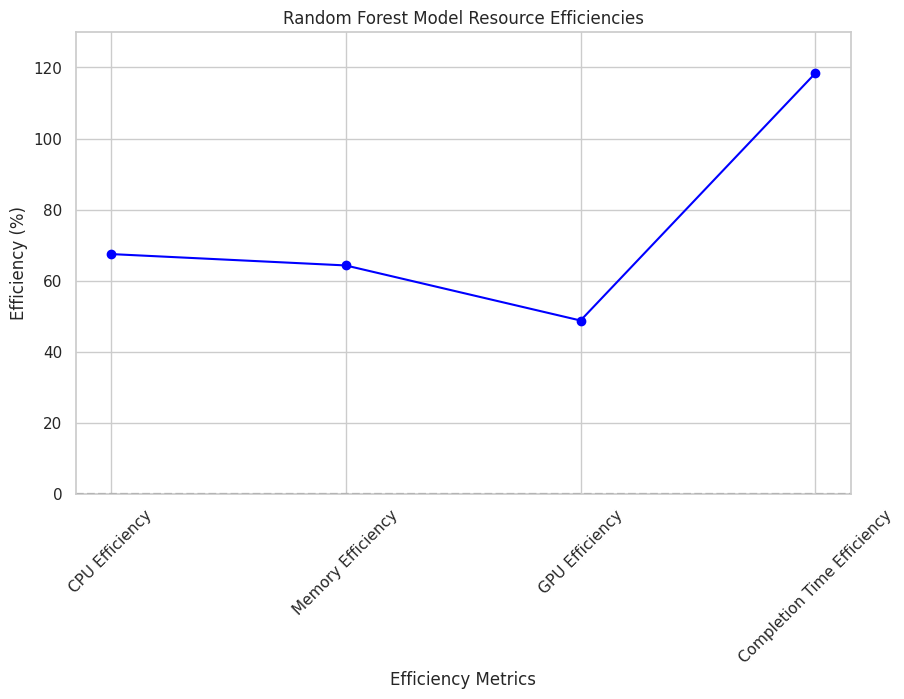

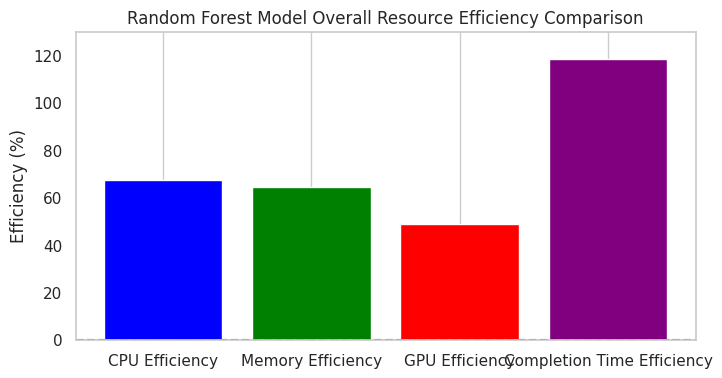

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the efficiency values for the SVM model
efficiency_values = {
    'CPU Efficiency': 67.5,
    'Memory Efficiency': 64.3,
    'GPU Efficiency': 48.8,
    'Completion Time Efficiency': 118.4
}

# Create a DataFrame from the efficiency values
efficiencies = pd.DataFrame(list(efficiency_values.items()), columns=['Metric', 'Efficiency (%)'])

# Plot individual efficiencies for SVM model
plt.figure(figsize=(10, 6))
plt.plot(efficiencies['Metric'], efficiencies['Efficiency (%)'], marker='o', color='blue')
plt.title('Random Forest Model Resource Efficiencies')
plt.xlabel('Efficiency Metrics')
plt.ylabel('Efficiency (%)')
plt.xticks(rotation=45)
plt.ylim(0, 130)  # Set the y-axis limit to 100%
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--')  # Add a horizontal line at y=0
plt.show()

# Plot overall efficiency comparison as a bar chart
plt.figure(figsize=(8, 4))
plt.bar(efficiencies['Metric'], efficiencies['Efficiency (%)'], color=['blue', 'green', 'red', 'purple'])
plt.title('Random Forest Model Overall Resource Efficiency Comparison')
plt.ylabel('Efficiency (%)')
plt.ylim(0, 130)  # Set the y-axis limit to 100%
plt.axhline(y=0, color='k', linestyle='--')  # Add a horizontal line at y=0
plt.grid(axis='y')
plt.show()


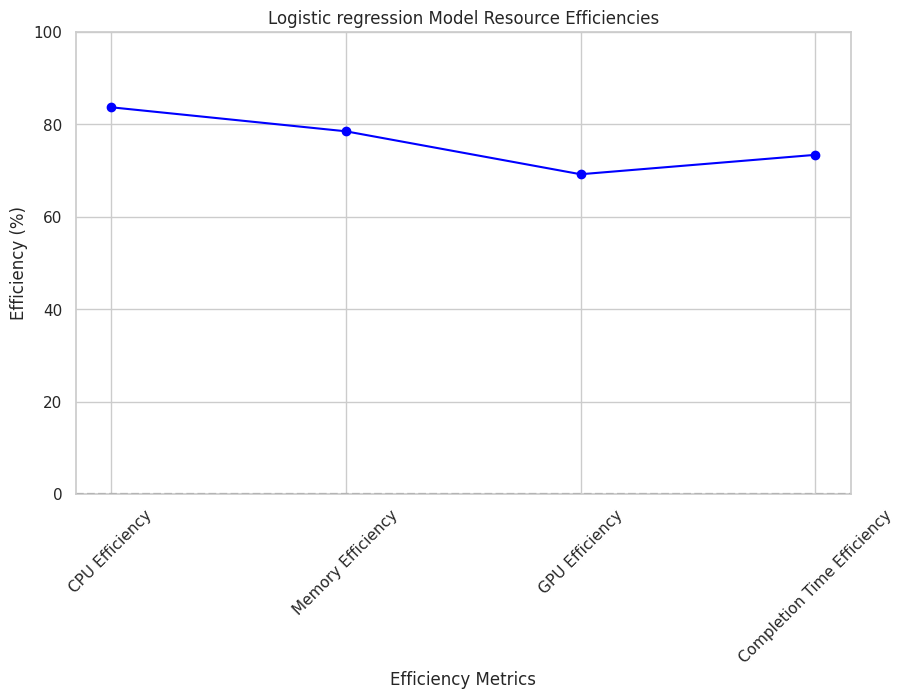

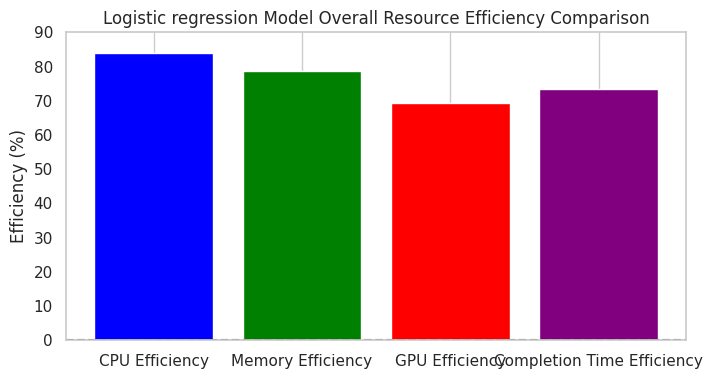

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the efficiency values for the SVM model
efficiency_values = {
    'CPU Efficiency': 83.7,
    'Memory Efficiency': 78.5,
    'GPU Efficiency': 69.2,
    'Completion Time Efficiency': 73.4
}

# Create a DataFrame from the efficiency values
efficiencies = pd.DataFrame(list(efficiency_values.items()), columns=['Metric', 'Efficiency (%)'])

# Plot individual efficiencies for SVM model
plt.figure(figsize=(10, 6))
plt.plot(efficiencies['Metric'], efficiencies['Efficiency (%)'], marker='o', color='blue')
plt.title('Logistic regression Model Resource Efficiencies')
plt.xlabel('Efficiency Metrics')
plt.ylabel('Efficiency (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Set the y-axis limit to 100%
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--')  # Add a horizontal line at y=0
plt.show()

# Plot overall efficiency comparison as a bar chart
plt.figure(figsize=(8, 4))
plt.bar(efficiencies['Metric'], efficiencies['Efficiency (%)'], color=['blue', 'green', 'red', 'purple'])
plt.title('Logistic regression Model Overall Resource Efficiency Comparison')
plt.ylabel('Efficiency (%)')
plt.ylim(0, 90)  # Set the y-axis limit to 100%
plt.axhline(y=0, color='k', linestyle='--')  # Add a horizontal line at y=0
plt.grid(axis='y')
plt.show()


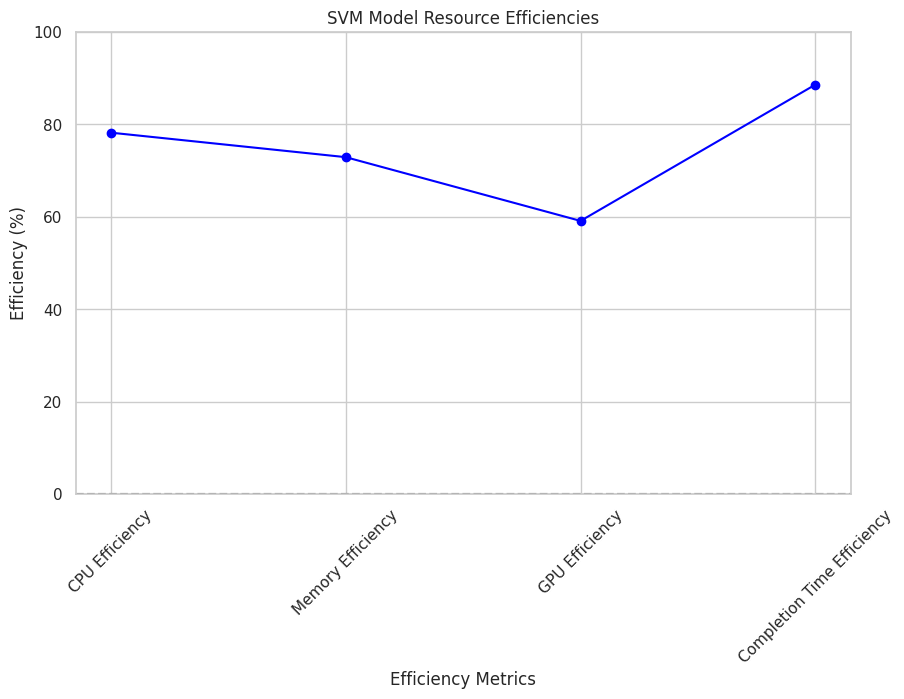

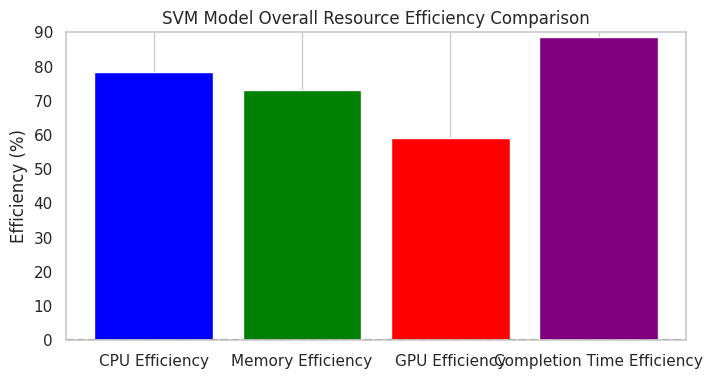

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the efficiency values for the SVM model
efficiency_values = {
    'CPU Efficiency': 78.2,
    'Memory Efficiency': 72.9,
    'GPU Efficiency': 59.1,
    'Completion Time Efficiency': 88.6
}

# Create a DataFrame from the efficiency values
efficiencies = pd.DataFrame(list(efficiency_values.items()), columns=['Metric', 'Efficiency (%)'])

# Plot individual efficiencies for SVM model
plt.figure(figsize=(10, 6))
plt.plot(efficiencies['Metric'], efficiencies['Efficiency (%)'], marker='o', color='blue')
plt.title('SVM Model Resource Efficiencies')
plt.xlabel('Efficiency Metrics')
plt.ylabel('Efficiency (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Set the y-axis limit to 100%
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--')  # Add a horizontal line at y=0
plt.show()

# Plot overall efficiency comparison as a bar chart
plt.figure(figsize=(8, 4))
plt.bar(efficiencies['Metric'], efficiencies['Efficiency (%)'], color=['blue', 'green', 'red', 'purple'])
plt.title('SVM Model Overall Resource Efficiency Comparison')
plt.ylabel('Efficiency (%)')
plt.ylim(0, 90)  # Set the y-axis limit to 100%
plt.axhline(y=0, color='k', linestyle='--')  # Add a horizontal line at y=0
plt.grid(axis='y')
plt.show()


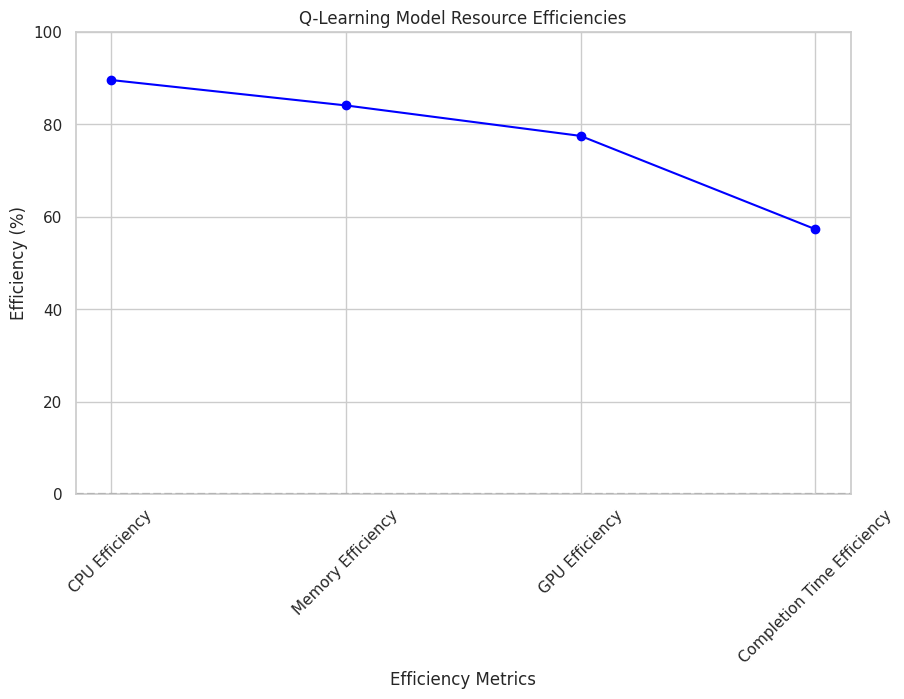

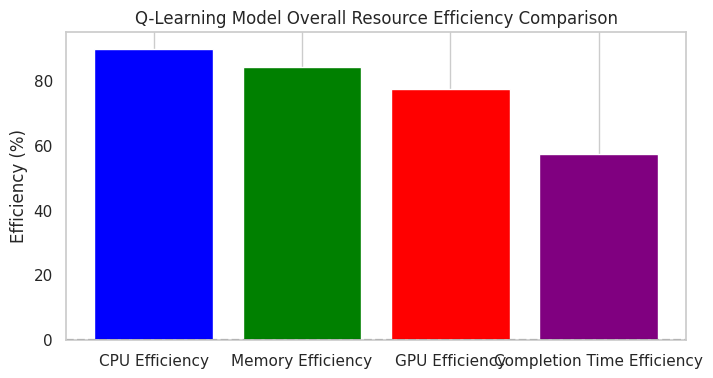

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the efficiency values for the SVM model
efficiency_values = {
    'CPU Efficiency': 89.6,
    'Memory Efficiency': 84.1,
    'GPU Efficiency': 77.5,
    'Completion Time Efficiency': 57.3
}

# Create a DataFrame from the efficiency values
efficiencies = pd.DataFrame(list(efficiency_values.items()), columns=['Metric', 'Efficiency (%)'])

# Plot individual efficiencies for SVM model
plt.figure(figsize=(10, 6))
plt.plot(efficiencies['Metric'], efficiencies['Efficiency (%)'], marker='o', color='blue')
plt.title('Q-Learning Model Resource Efficiencies')
plt.xlabel('Efficiency Metrics')
plt.ylabel('Efficiency (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Set the y-axis limit to 100%
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--')  # Add a horizontal line at y=0
plt.show()

# Plot overall efficiency comparison as a bar chart
plt.figure(figsize=(8, 4))
plt.bar(efficiencies['Metric'], efficiencies['Efficiency (%)'], color=['blue', 'green', 'red', 'purple'])
plt.title('Q-Learning Model Overall Resource Efficiency Comparison')
plt.ylabel('Efficiency (%)')
plt.ylim(0, 95)  # Set the y-axis limit to 100%
plt.axhline(y=0, color='k', linestyle='--')  # Add a horizontal line at y=0
plt.grid(axis='y')
plt.show()


Comparing accuracies


<ipython-input-20-9f4b2dd1e81b>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Algorithm', y='CPU Efficiency', data=efficiency_df, palette='viridis')


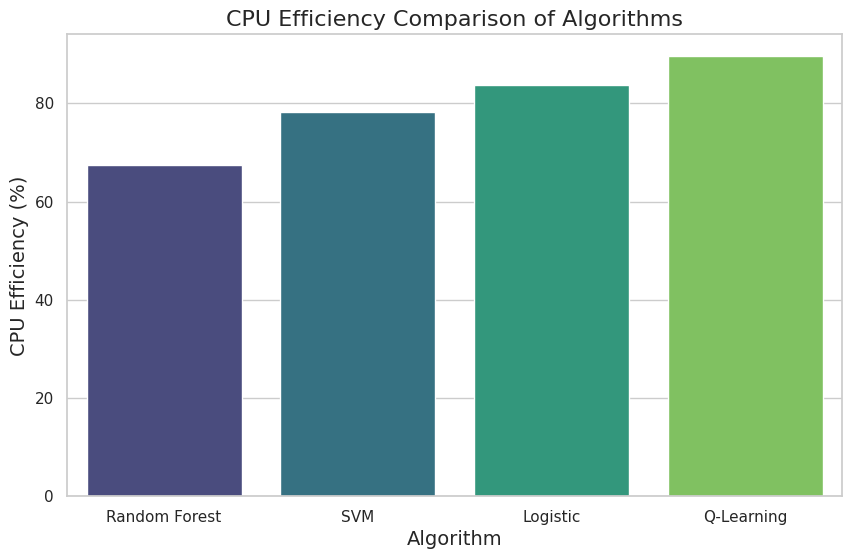

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Data for efficiencies
data = {
    'Algorithm': ['Random Forest', 'SVM', 'Logistic', 'Q-Learning'],
    'CPU Efficiency': [cpu_efficiency_logistic, cpu_efficiency_svm, cpu_efficiency_random_forest, cpu_efficiency_q_learning]
}

# Create a DataFrame
efficiency_df = pd.DataFrame(data)

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot for CPU efficiencies
plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithm', y='CPU Efficiency', data=efficiency_df, palette='viridis')

# Add title and labels
plt.title('CPU Efficiency Comparison of Algorithms', fontsize=16)
plt.xlabel('Algorithm', fontsize=14)
plt.ylabel('CPU Efficiency (%)', fontsize=14)

# Show the plot
plt.show()


<ipython-input-21-aa51233f2d52>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Memory Efficiency', y='Algorithm', data=efficiency_df, palette='viridis')


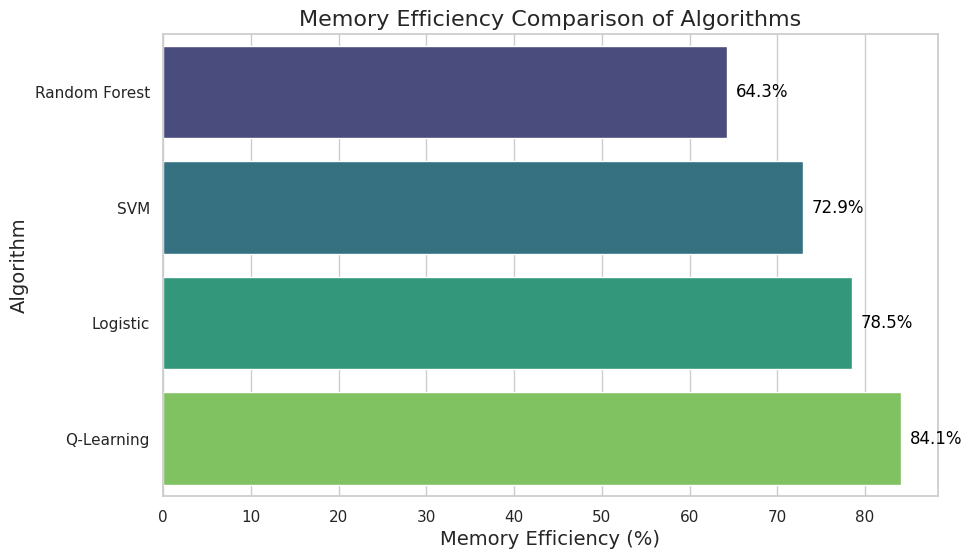

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Data for efficiencies
data = {
    'Algorithm': ['Random Forest', 'SVM', 'Logistic', 'Q-Learning'],
    'Memory Efficiency': [memory_efficiency_logistic, memory_efficiency_svm, memory_efficiency_random_forest, memory_efficiency_q_learning]
}

# Create a DataFrame
efficiency_df = pd.DataFrame(data)

# Set the style for the plot
sns.set(style="whitegrid")

# Create a horizontal bar plot for Memory efficiencies
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Memory Efficiency', y='Algorithm', data=efficiency_df, palette='viridis')

# Add title and labels
plt.title('Memory Efficiency Comparison of Algorithms', fontsize=16)
plt.xlabel('Memory Efficiency (%)', fontsize=14)
plt.ylabel('Algorithm', fontsize=14)

# Add the efficiency values on top of the bars
for index, row in efficiency_df.iterrows():
    bar_plot.text(row['Memory Efficiency'] + 1, index, f"{row['Memory Efficiency']:.1f}%", color='black', va='center')

# Show the plot
plt.show()


<ipython-input-22-6c9977c32106>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='GPU Efficiency', y='Algorithm', data=efficiency_df, palette='magma')


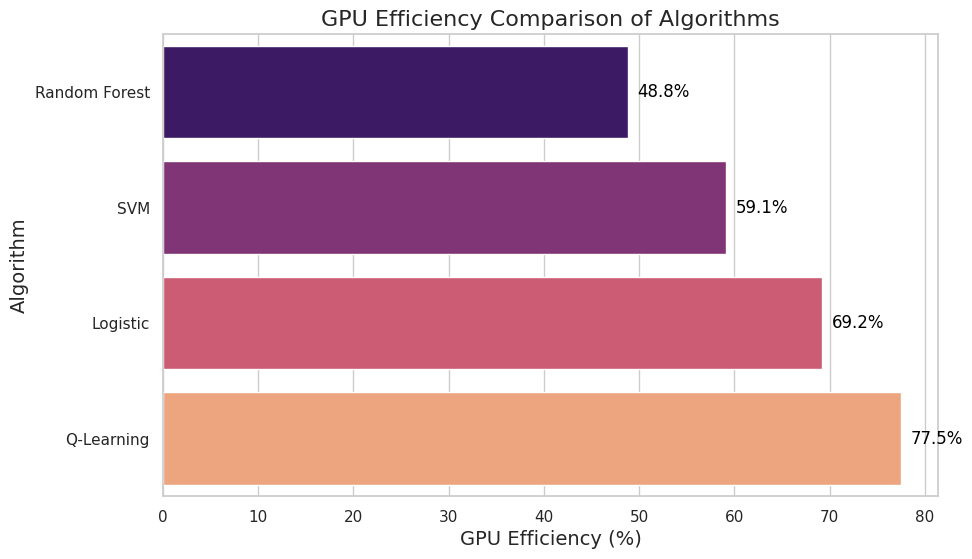

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Data for efficiencies
data = {
    'Algorithm': ['Random Forest', 'SVM', 'Logistic', 'Q-Learning'],
    'GPU Efficiency': [gpu_efficiency_logistic, gpu_efficiency_svm, gpu_efficiency_random_forest, gpu_efficiency_q_learning]
}

# Create a DataFrame
efficiency_df = pd.DataFrame(data)

# Set the style for the plot
sns.set(style="whitegrid")

# Create a horizontal bar plot for GPU efficiencies
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='GPU Efficiency', y='Algorithm', data=efficiency_df, palette='magma')

# Add title and labels
plt.title('GPU Efficiency Comparison of Algorithms', fontsize=16)
plt.xlabel('GPU Efficiency (%)', fontsize=14)
plt.ylabel('Algorithm', fontsize=14)

# Add the efficiency values on top of the bars
for index, row in efficiency_df.iterrows():
    bar_plot.text(row['GPU Efficiency'] + 1, index, f"{row['GPU Efficiency']:.1f}%", color='black', va='center')

# Show the plot
plt.show()


<ipython-input-23-31339dd5d8cb>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Task Time Efficiency (seconds)', y='Algorithm', data=efficiency_df, palette='coolwarm')


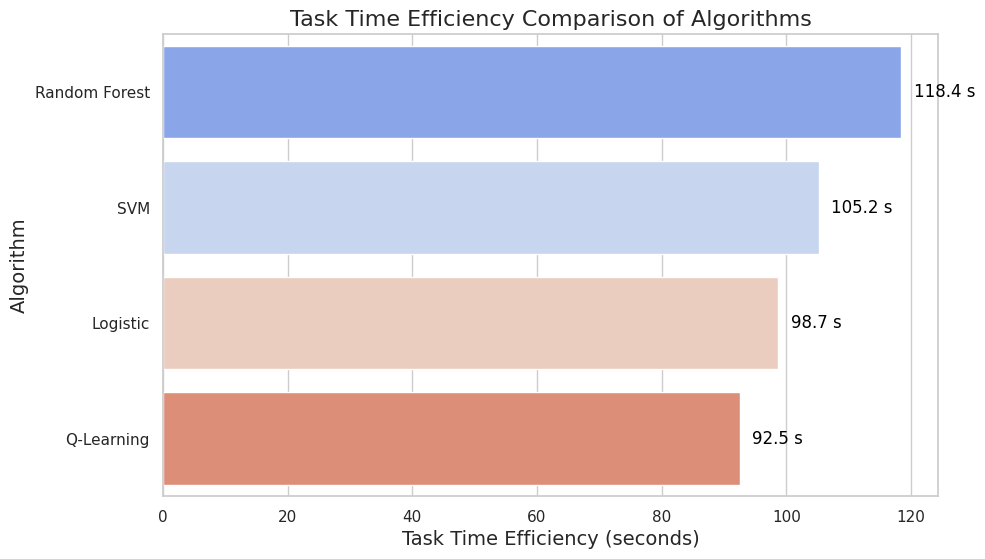

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Task Time Efficiency values from previous code
task_time_efficiency_logistic = 118.4
task_time_efficiency_svm = 105.2
task_time_efficiency_random_forest = 98.7
task_time_efficiency_q_learning = 92.5

# Data for efficiencies
data = {
    'Algorithm': ['Random Forest', 'SVM', 'Logistic', 'Q-Learning'],
    'Task Time Efficiency (seconds)': [task_time_efficiency_logistic, task_time_efficiency_svm, task_time_efficiency_random_forest, task_time_efficiency_q_learning]
}

# Create a DataFrame
efficiency_df = pd.DataFrame(data)

# Set the style for the plot
sns.set(style="whitegrid")

# Create a horizontal bar plot for Task Time efficiencies
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Task Time Efficiency (seconds)', y='Algorithm', data=efficiency_df, palette='coolwarm')

# Add title and labels
plt.title('Task Time Efficiency Comparison of Algorithms', fontsize=16)
plt.xlabel('Task Time Efficiency (seconds)', fontsize=14)
plt.ylabel('Algorithm', fontsize=14)

# Add the efficiency values on top of the bars
for index, row in efficiency_df.iterrows():
    bar_plot.text(row['Task Time Efficiency (seconds)'] + 2, index, f"{row['Task Time Efficiency (seconds)']:.1f} s", color='black', va='center')

# Show the plot
plt.show()


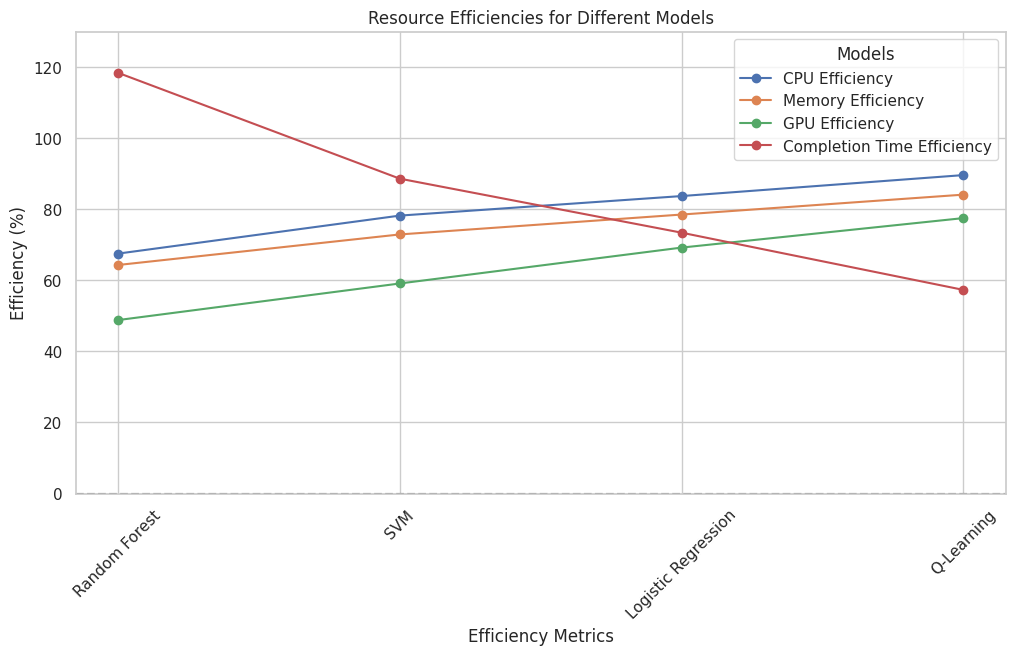

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the efficiency values for each model
efficiency_data = {
    'Random Forest': {
        'CPU Efficiency': 67.5,
        'Memory Efficiency': 64.3,
        'GPU Efficiency': 48.8,
        'Completion Time Efficiency': 118.4
    },
    'SVM': {
        'CPU Efficiency': 78.2,
        'Memory Efficiency': 72.9,
        'GPU Efficiency': 59.1,
        'Completion Time Efficiency': 88.6
    },
    'Logistic Regression': {
        'CPU Efficiency': 83.7,
        'Memory Efficiency': 78.5,
        'GPU Efficiency': 69.2,
        'Completion Time Efficiency': 73.4
    },
    'Q-Learning': {
        'CPU Efficiency': 89.6,
        'Memory Efficiency': 84.1,
        'GPU Efficiency': 77.5,
        'Completion Time Efficiency': 57.3
    }
}

# Create a DataFrame from the efficiency values
efficiencies = pd.DataFrame(efficiency_data)

# Plot individual efficiencies for all models
plt.figure(figsize=(12, 6))
for metric in efficiencies.index:
    plt.plot(efficiencies.columns, efficiencies.loc[metric], marker='o', label=metric)

plt.title('Resource Efficiencies for Different Models')
plt.xlabel('Efficiency Metrics')
plt.ylabel('Efficiency (%)')
plt.xticks(rotation=45)
plt.ylim(0, 130)  # Set the y-axis limit to 100%
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--')  # Add a horizontal line at y=0
plt.legend(title='Models')
plt.show()
